<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/order-statistic-mid-point/order_statistic_mid_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **order_statistic_mid_point**

To apply an order statistic filter to an image, one typically uses 3x3, 5x5 or 7x7 windows. For non-Gaussian noise, the optimal OSF is superior to taking a local average for flat regions. The main problem with such filters is the underlying stationarity assumption: the derivation of the OSF assumes that X is a stationary point process, an assumption which is grossly violated if there is an edge, line, or other strong signal activity in the window. Figure 1.3 illustrates this for a test image degraded by additive white Gaussian noise with  . The median filter (lower left) preserves edges (the checkerboard and the bagel), but wipes out fine details (the text and lines). The 3x3 average, which is the optimal OSF for Gaussian noise, blurs too much.



* # **The midpoint Filter**

The class midpoint (or class mark) is a specific point in the center of the bins (categories) in a frequency distribution table; It’s also the center of a bar in a histogram. It is defined as the average of the upper and lower class limits. The lower class limit is the lowest value in a bin (a particular category); The upper class limits are the highest values that can be in the bin.

<img src="https://www.graphicsmill.com/docs/gm/CloseF.png" >

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

--2020-12-21 20:21:58--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.193.24.222, 2600:1417:76:484::1931, 2600:1417:76:485::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.193.24.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K   474KB/s    in 0.3s    

2020-12-21 20:21:58 (474 KB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



In [6]:
img = cv.imread('AMOL_IRAN.jpg')
if len(img.shape) == 3:
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [7]:
img = np.array(img)
shape = img.shape
output = np.zeros((shape[0], shape[1]), dtype='uint8')
step = 1
win = 3
for i in range(0, shape[0], step):
    for j in range(0, shape[1], step):
        if i <= int(win/2) or shape[0]-i <= int(win/2) or j <= int(win/2) or shape[1]-j <= int(win/2):
            continue
        kernel = img[i-int(win/2):i+int(win/2)+1, j-int(win/2):j+int(win/2)+1]              
        output[i, j] = np.mean([np.min(kernel), np.max(kernel)])

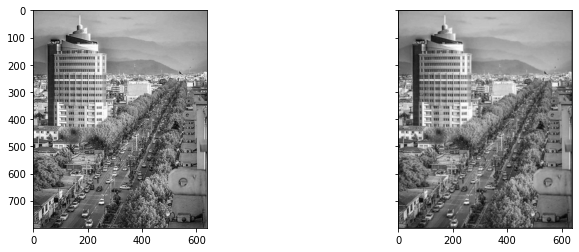

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))
ax1.imshow(img, cmap='gray')
ax2.imshow(output, cmap='gray')
plt.show()